In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


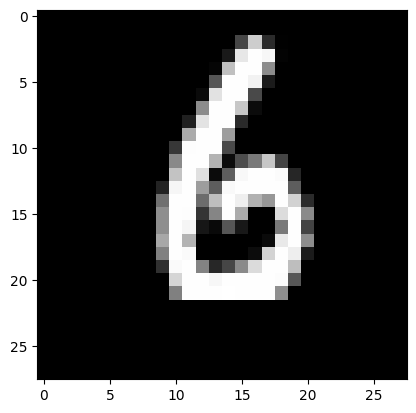

Label:  6
Max value:  255


In [ ]:
sample_id = np.random.randint(60000)
plt.imshow(x_train[sample_id], cmap="gray")
plt.show()
print("Label: ", y_train[sample_id])
print("Max value: ", np.max(x_train[sample_id]))

In [ ]:
num_classes = 10

x_train = x_train / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)

x_test = x_test / 255.0
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

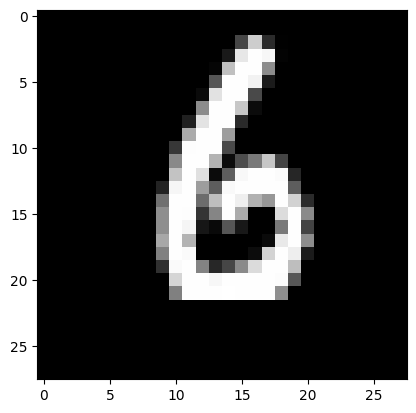

Label:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Max value:  1.0


In [ ]:
plt.imshow(x_train[sample_id], cmap="gray")
plt.show()
print("Label: ", y_train[sample_id])
print("Max value: ", np.max(x_train[sample_id]))

In [ ]:
#converting 2D image to 3D volume

x_train = np.expand_dims(x_train, axis=-1) # (28, 28) -> (28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1) # (28, 28) -> (28, 28, 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
img_rows, img_cols = 28, 28
num_channels = 1
input_shape = (img_rows, img_cols, num_channels)

In [ ]:
14*14*16

3136

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (5, 5),
                                 strides=(1, 1),
                                 activation='relu',
                                 padding='same',
                                 input_shape=input_shape,
                                 name="cse428"))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Flatten())
#>>>>>>>>>>>> 3136
model.add(tf.keras.layers.Dense(100, activation='relu'))
#>>>>>>>>>>>> 313600 connections: shape here 100
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=25, verbose=1, validation_data=(x_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 20s 4ms/step - loss: 0.4394 - accuracy: 0.8757 - val_loss: 0.2468 - val_accuracy: 0.9252
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2071 - accuracy: 0.9391 - val_loss: 0.1540 - val_accuracy: 0.9549
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1504 - accuracy: 0.9549 - val_loss: 0.1250 - val_accuracy: 0.9627
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1194 - accuracy: 0.9644 - val_loss: 0.1011 - val_accuracy: 0.9698
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0979 - accuracy: 0.9712 - val_loss: 0.0861 - val_accuracy: 0.9725
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0839 - accuracy: 0.9753 - val_loss: 0.0745 - val_accuracy: 0.9776
Epoch 7/25
   1/1875 [..............................] - ETA: 14s - loss: 0.0121 - accuracy: 1.0000

KeyboardInterrupt: ignored

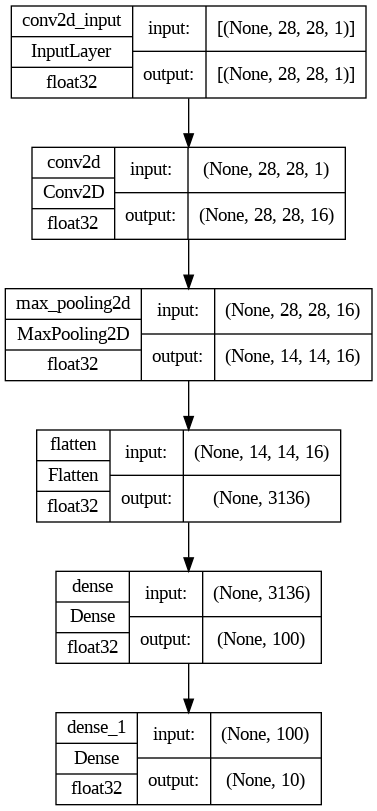

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)